## Analysis of IMDB Data

# PART 1 - Installation and Initial Setup

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pyspark.sql.functions import col, split, explode
from pyspark.sql import SparkSession
# Initialize Spark session
spark = SparkSession.builder.appName("CSVExample").getOrCreate()

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/03/26 18:56:43 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


## Loading Data

Load all data into a Spark dataframe object 

In [2]:
name = spark.read.csv('data/name.basics.new.tsv', sep=r'\t', header=True, inferSchema = True)
titles = spark.read.csv('data/title.basic.new.tsv', sep=r'\t', header=True,inferSchema = True)
principles = spark.read.csv('data/title.principles.new.tsv', sep=r'\t', header=True, inferSchema = True)
ratings = spark.read.csv('data/title.ratings.new.tsv', sep=r'\t', header=True, inferSchema = True)

## Dataset 1 - Name Basic

Previewing the data and seeing the schema of the dataset

In [5]:
name.select("nconst","primaryName","primaryProfession","birthYear").show(15, truncate=False)
name.printSchema()

+---------+-------------------+-------------------------------------+---------+
|nconst   |primaryName        |primaryProfession                    |birthYear|
+---------+-------------------+-------------------------------------+---------+
|nm0000001|Fred Astaire       |soundtrack,actor,miscellaneous       |1899     |
|nm0000002|Lauren Bacall      |actress,soundtrack                   |1924     |
|nm0000003|Brigitte Bardot    |actress,soundtrack,music_department  |1934     |
|nm0000004|John Belushi       |actor,soundtrack,writer              |1949     |
|nm0000005|Ingmar Bergman     |writer,director,actor                |1918     |
|nm0000006|Ingrid Bergman     |actress,soundtrack,producer          |1915     |
|nm0000007|Humphrey Bogart    |actor,soundtrack,producer            |1899     |
|nm0000008|Marlon Brando      |actor,soundtrack,director            |1924     |
|nm0000009|Richard Burton     |actor,soundtrack,producer            |1925     |
|nm0000010|James Cagney       |actor,sou

## Dataset 2 - Title Basics

Previewing the data and seeing the schema of the dataset

In [8]:
titles.select("tconst", "titleType", "primaryTitle", "genres").show(5, truncate=False)
titles.printSchema()

+---------+---------+----------------------+------------------------+
|tconst   |titleType|primaryTitle          |genres                  |
+---------+---------+----------------------+------------------------+
|tt0000001|short    |Carmencita            |Documentary,Short       |
|tt0000002|short    |Le clown et ses chiens|Animation,Short         |
|tt0000003|short    |Pauvre Pierrot        |Animation,Comedy,Romance|
|tt0000004|short    |Un bon bock           |Animation,Short         |
|tt0000005|short    |Blacksmith Scene      |Comedy,Short            |
+---------+---------+----------------------+------------------------+
only showing top 5 rows

root
 |-- tconst: string (nullable = true)
 |-- titleType: string (nullable = true)
 |-- primaryTitle: string (nullable = true)
 |-- originalTitle: string (nullable = true)
 |-- isAdult: string (nullable = true)
 |-- startYear: string (nullable = true)
 |-- endYear: string (nullable = true)
 |-- runtimeMinutes: string (nullable = true)
 |-- ge

#### Number of Unique Titles

In [11]:
z = titles.select("titleType").distinct()
z.show()


+------------+
|   titleType|
+------------+
|    tvSeries|
|tvMiniSeries|
|     tvMovie|
|   tvEpisode|
|       movie|
|   tvSpecial|
|       video|
|   videoGame|
|     tvShort|
|       short|
|     tvPilot|
+------------+



In [14]:
print("There are " + str(z.count()) + " unique title types in the dataset")

There are 11 unique title types in the dataset


## Dataset 3 - Title Principles

Display the schema below:

In [15]:
principles.select("tconst", "ordering", "nconst", "category", "job", "characters").filter(col("category") == "producer").show(15, truncate=False)
principles.printSchema()

+---------+--------+---------+--------+--------+----------+
|tconst   |ordering|nconst   |category|job     |characters|
+---------+--------+---------+--------+--------+----------+
|tt0000003|2       |nm1770680|producer|producer|\N        |
|tt0000005|4       |nm0249379|producer|producer|\N        |
|tt0000007|5       |nm0249379|producer|producer|\N        |
|tt0000020|2       |nm0666972|producer|producer|\N        |
|tt0000024|4       |nm0666972|producer|producer|\N        |
|tt0000025|2       |nm0666972|producer|producer|\N        |
|tt0000039|1       |nm0666972|producer|producer|\N        |
|tt0000041|2       |nm0525908|producer|producer|\N        |
|tt0000061|3       |nm0666972|producer|producer|\N        |
|tt0000089|3       |nm0525910|producer|producer|\N        |
|tt0000104|1       |nm0525910|producer|producer|\N        |
|tt0000121|5       |nm0666972|producer|producer|\N        |
|tt0000125|1       |nm0666972|producer|producer|\N        |
|tt0000147|6       |nm0103755|producer|p

## Dataset 3 - Title Ratings

Display the schema below:

Display the first 10 rows in a descending order by the number of votes

In [16]:
ratings.select("tconst", "averageRating", "numVotes").orderBy(col("numVotes").desc()).show(10, truncate=False)
ratings.printSchema()

+---------+-------------+--------+
|tconst   |averageRating|numVotes|
+---------+-------------+--------+
|tt0111161|9.3          |2868594 |
|tt0468569|9.0          |2850372 |
|tt1375666|8.8          |2531543 |
|tt0137523|8.8          |2303989 |
|tt0944947|9.2          |2265760 |
|tt0109830|8.8          |2239746 |
|tt0110912|8.9          |2203191 |
|tt0903747|9.5          |2114358 |
|tt0816692|8.7          |2073181 |
|tt0133093|8.7          |2038364 |
+---------+-------------+--------+
only showing top 10 rows

root
 |-- tconst: string (nullable = true)
 |-- averageRating: double (nullable = true)
 |-- numVotes: integer (nullable = true)



## Overview of Data

Display the number of rows and columns in each dataFrame object.

In [17]:
print("Number of columns in Name Basics table: ", len(name.columns))
print("Number of rows in Name Basics table:", titles.count())
print(" ")
print("Number of columns in Title Basics table: ", len(titles.columns))
print("Number of rows in Title Basics table:", titles.count())
print(" ")
print("Number of columns in Title Principles table: ", len(principles.columns))
print("Number of rows in Title Principles table:", principles.count())
print(" ")
print("Number of columns in Title Ratings table: ", len(ratings.columns))
print("Number of rows in Title Ratings table:", ratings.count())

Number of columns in Name Basics table:  6


Number of rows in Name Basics table: 10613322
 
Number of columns in Title Basics table:  9


Number of rows in Title Basics table: 10613322
 
Number of columns in Title Principles table:  6


Number of rows in Title Principles table: 60833800
 
Number of columns in Title Ratings table:  3
Number of rows in Title Ratings table: 1412275


# PART 2 - Analyzing Movie Genres

Questions I want to find answer to: 
* How many unique movie genres are represented in this dataset?
* How many movies are categorized as Comedy, for instance?
* What are the top 20 most popular genres available?

## Association Table


In [18]:
association = titles.select("tconst", "titleType", "genres")
association.show(15, truncate=False)

+---------+---------+------------------------+
|tconst   |titleType|genres                  |
+---------+---------+------------------------+
|tt0000001|short    |Documentary,Short       |
|tt0000002|short    |Animation,Short         |
|tt0000003|short    |Animation,Comedy,Romance|
|tt0000004|short    |Animation,Short         |
|tt0000005|short    |Comedy,Short            |
|tt0000006|short    |Short                   |
|tt0000007|short    |Short,Sport             |
|tt0000008|short    |Documentary,Short       |
|tt0000009|movie    |Romance                 |
|tt0000010|short    |Documentary,Short       |
|tt0000011|short    |Documentary,Short       |
|tt0000012|short    |Documentary,Short       |
|tt0000013|short    |Documentary,Short       |
|tt0000014|short    |Comedy,Short            |
|tt0000015|short    |Animation,Short         |
+---------+---------+------------------------+
only showing top 15 rows



Denormalization Process

In [19]:
association_derived = association.withColumn("genres", explode(split('genres',',')))
association_derived.show(25, truncate=False)

+---------+---------+-----------+
|tconst   |titleType|genres     |
+---------+---------+-----------+
|tt0000001|short    |Documentary|
|tt0000001|short    |Short      |
|tt0000002|short    |Animation  |
|tt0000002|short    |Short      |
|tt0000003|short    |Animation  |
|tt0000003|short    |Comedy     |
|tt0000003|short    |Romance    |
|tt0000004|short    |Animation  |
|tt0000004|short    |Short      |
|tt0000005|short    |Comedy     |
|tt0000005|short    |Short      |
|tt0000006|short    |Short      |
|tt0000007|short    |Short      |
|tt0000007|short    |Sport      |
|tt0000008|short    |Documentary|
|tt0000008|short    |Short      |
|tt0000009|movie    |Romance    |
|tt0000010|short    |Documentary|
|tt0000010|short    |Short      |
|tt0000011|short    |Documentary|
|tt0000011|short    |Short      |
|tt0000012|short    |Documentary|
|tt0000012|short    |Short      |
|tt0000013|short    |Documentary|
|tt0000013|short    |Short      |
+---------+---------+-----------+
only showing t

## Total Unique Movie Genres

What is the total number of unique movie genres?

In [24]:
unique_genres = association_derived.select("genres").distinct().count()
print("The Number Of Unique Movie Genres:", unique_genres)

The Number Of Unique Movie Genres: 29


What are the unique movie genres?

In [33]:
a = association_derived.select("genres").distinct()
a.show(30, truncate=False)

+-----------+
|genres     |
+-----------+
|Crime      |
|Romance    |
|Thriller   |
|Adventure  |
|\N         |
|Drama      |
|War        |
|Documentary|
|Reality-TV |
|Family     |
|Fantasy    |
|Game-Show  |
|Adult      |
|History    |
|Mystery    |
|Musical    |
|Animation  |
|Music      |
|Film-Noir  |
|Short      |
|Horror     |
|Western    |
|Biography  |
|Comedy     |
|Sport      |
|Action     |
|Talk-Show  |
|Sci-Fi     |
|News       |
+-----------+



In [34]:

b = a.filter(col("genres") != "\\N") #Removing the "N" values from the dataset
b.show(30, truncate=False)

+-----------+
|genres     |
+-----------+
|Crime      |
|Romance    |
|Thriller   |
|Adventure  |
|Drama      |
|War        |
|Documentary|
|Reality-TV |
|Family     |
|Fantasy    |
|Game-Show  |
|Adult      |
|History    |
|Mystery    |
|Musical    |
|Animation  |
|Music      |
|Film-Noir  |
|Short      |
|Horror     |
|Western    |
|Biography  |
|Comedy     |
|Sport      |
|Action     |
|Talk-Show  |
|Sci-Fi     |
|News       |
+-----------+



## Top Genres by Movies

Now let's find the highest rated genres in this dataset by rolling up genres.

### Average Rating / Genre

First, let's join our two dataframes (title ratings and title basics) by tconst. Using inner join. 

In [10]:
ratings_genres = titles.join(ratings, on="tconst", how="inner").show(10)

+---------+---------+--------------------+--------------------+-------+---------+-------+--------------+--------------------+-------------+--------+
|   tconst|titleType|        primaryTitle|       originalTitle|isAdult|startYear|endYear|runtimeMinutes|              genres|averageRating|numVotes|
+---------+---------+--------------------+--------------------+-------+---------+-------+--------------+--------------------+-------------+--------+
|tt0000015|    short| Autour d'une cabine| Autour d'une cabine|      0|     1894|     \N|             2|     Animation,Short|          6.1|    1150|
|tt0000019|    short|    The Clown Barber|    The Clown Barber|      0|     1898|     \N|            \N|        Comedy,Short|          5.1|      32|
|tt0000058|    short|Cortège de tzar a...|Cortège de tzar a...|      0|     1896|     \N|            \N|   Documentary,Short|          4.2|      34|
|tt0000095|    short|The Mysterious Paper|    Le papier protée|      0|     1896|     \N|            \N|  

In [11]:
ratings_genres = titles.join(ratings, on="tconst", how="inner") \
                      .where(col("titleType") == "movie") \
                      .where(col("genres") != "\\N") \
                      .withColumn("genres", explode(split('genres',','))) \
                      .select("genres", "averageRating")
ratings_genres.show(10)

+---------+-------------+
|   genres|averageRating|
+---------+-------------+
|    Drama|          4.5|
|    Drama|          4.5|
|  Romance|          4.5|
|Biography|          6.6|
|    Drama|          6.6|
|  Romance|          6.6|
|    Crime|          6.0|
| Thriller|          6.0|
|    Crime|          6.9|
|    Drama|          6.9|
+---------+-------------+
only showing top 10 rows



Now, let's aggregate along the averageRating column to get a resultant dataframe that displays average rating per genre.

In [12]:
from pyspark.sql.functions import round
ratings_genres_agg = ratings_genres.groupBy("genres") \
                                   .agg({"averageRating": "avg"}) \
                                   .withColumnRenamed("avg(averageRating)", "averageRating") \
                                   .withColumn("averageRating", round(col("averageRating"), 3)) \
                                   .filter(col("genres") != "\\N")

ratings_genres_agg.show(20, truncate=False)

+-----------+-------------+
|genres     |averageRating|
+-----------+-------------+
|Crime      |5.985        |
|Romance    |6.102        |
|Thriller   |5.613        |
|Adventure  |5.866        |
|Drama      |6.248        |
|War        |6.403        |
|Documentary|7.216        |
|Reality-TV |6.701        |
|Family     |6.205        |
|Fantasy    |5.898        |
|Adult      |5.554        |
|History    |6.798        |
|Mystery    |5.847        |
|Musical    |6.187        |
|Animation  |6.367        |
|Music      |6.755        |
|Film-Noir  |6.463        |
|Horror     |5.002        |
|Western    |5.84         |
|Biography  |6.951        |
+-----------+-------------+
only showing top 20 rows



### Horizontal Bar Chart of Top Genres

In [13]:
s_ratings = ratings_genres_agg.sort(col("averageRating").desc())
s_ratings.show(30, truncate=False)

+-----------+-------------+
|genres     |averageRating|
+-----------+-------------+
|Documentary|7.216        |
|News       |7.203        |
|Biography  |6.951        |
|Game-Show  |6.88         |
|Talk-Show  |6.858        |
|History    |6.798        |
|Music      |6.755        |
|Reality-TV |6.701        |
|Sport      |6.623        |
|Film-Noir  |6.463        |
|War        |6.403        |
|Animation  |6.367        |
|Drama      |6.248        |
|Family     |6.205        |
|Musical    |6.187        |
|Romance    |6.102        |
|Crime      |5.985        |
|Comedy     |5.906        |
|Fantasy    |5.898        |
|Adventure  |5.866        |
|Mystery    |5.847        |
|Western    |5.84         |
|Action     |5.732        |
|Thriller   |5.613        |
|Adult      |5.554        |
|Sci-Fi     |5.353        |
|Horror     |5.002        |
|Short      |5.0          |
+-----------+-------------+



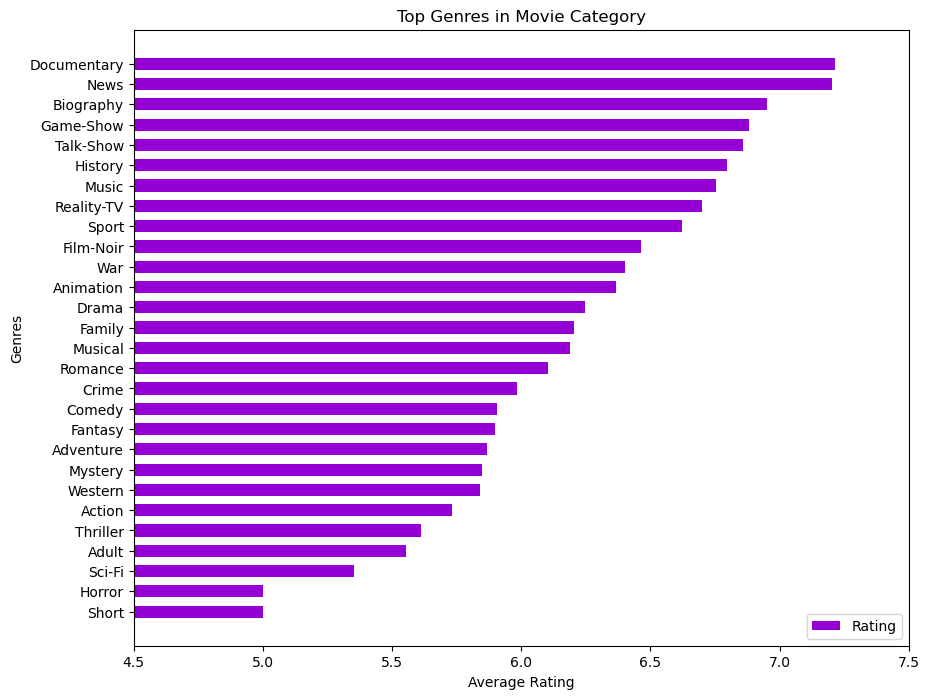

In [14]:
#Converting to Pandas DataFrame for Visualization
df_pandas = s_ratings.toPandas()
df_pandas = df_pandas.sort_values(by="averageRating", ascending=True)

#Plotting Genres as X-axis and averageRating as Y-axis
plt.figure(figsize=(10, 8))
plt.barh(df_pandas["genres"], df_pandas["averageRating"], color='darkviolet', height=0.6)

#Setting the range of the x-axis
plt.xlim(4.5, 7.5)

plt.xlabel("Average Rating")
plt.ylabel("Genres")
plt.title("Top Genres in Movie Category")

plt.legend(["Rating"], loc="lower right")

plt.show()

# PART 3 - Analyzing Job Categories

### Total Unique Job Categories

What is the total number of unique job categories?

In [41]:
principles.select("tconst", "category").show(30)

+---------+---------------+
|   tconst|       category|
+---------+---------------+
|tt0000001|           self|
|tt0000001|       director|
|tt0000001|cinematographer|
|tt0000002|       director|
|tt0000002|       composer|
|tt0000003|       director|
|tt0000003|       producer|
|tt0000003|       composer|
|tt0000003|         editor|
|tt0000004|       director|
|tt0000004|       composer|
|tt0000005|          actor|
|tt0000005|          actor|
|tt0000005|       director|
|tt0000005|       producer|
|tt0000006|       director|
|tt0000007|          actor|
|tt0000007|          actor|
|tt0000007|       director|
|tt0000007|       director|
|tt0000007|       producer|
|tt0000008|          actor|
|tt0000008|       director|
|tt0000008|cinematographer|
|tt0000009|        actress|
|tt0000009|          actor|
|tt0000009|          actor|
|tt0000009|       director|
|tt0000010|       director|
|tt0000011|          actor|
+---------+---------------+
only showing top 30 rows



What are the unique job categories available?

In [42]:
principles.select("category").distinct().show(truncate=False)

+-------------------+
|category           |
+-------------------+
|actress            |
|producer           |
|writer             |
|composer           |
|director           |
|self               |
|actor              |
|editor             |
|cinematographer    |
|archive_sound      |
|production_designer|
|archive_footage    |
+-------------------+



## Top Job Categories

Now let's find the top job categories in this dataset by rolling up categories.

### Counts of Titles / Job Category

The expected output should be:

| category | count |
|-------------|------------|
| a     | 15         |
| b     | 2          |
| c     | 45          |

Or something to that effect.

In [43]:
principles.select("tconst", "category").groupBy("category").count().show()

+-------------------+--------+
|           category|   count|
+-------------------+--------+
|            actress|10492210|
|           producer| 3944711|
|             writer| 8495903|
|           composer| 2014049|
|           director| 7006843|
|               self|10562296|
|              actor|13443688|
|             editor| 2012800|
|    cinematographer| 2068164|
|      archive_sound|    4794|
|production_designer|  383761|
|    archive_footage|  404581|
+-------------------+--------+



### Bar Chart of Top Job Categories

With this data available, let us now build a barchart of the top 5 categories. 

**HINT**: don't forget about the matplotlib magic!

```
%matplot plt
```

In [44]:
p_final = principles.select("tconst", "category").groupBy("category").count().sort(col("count").desc())
p_final.show()

+-------------------+--------+
|           category|   count|
+-------------------+--------+
|              actor|13443688|
|               self|10562296|
|            actress|10492210|
|             writer| 8495903|
|           director| 7006843|
|           producer| 3944711|
|    cinematographer| 2068164|
|           composer| 2014049|
|             editor| 2012800|
|    archive_footage|  404581|
|production_designer|  383761|
|      archive_sound|    4794|
+-------------------+--------+



You do not have to match the color and the figure size but all other aspects of the graph should be matched.

Hint: Google limit() in PySpark.

In [45]:
#Converting back to Pandas DataFrame for Plotting
p_final = p_final.limit(5)
df_prin = p_final.toPandas()

/var/folders/0c/_b9vm9gd0g3550f2fnprbxyh0000gn/T/ipykernel_22392/2820135780.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df_prin["category"])


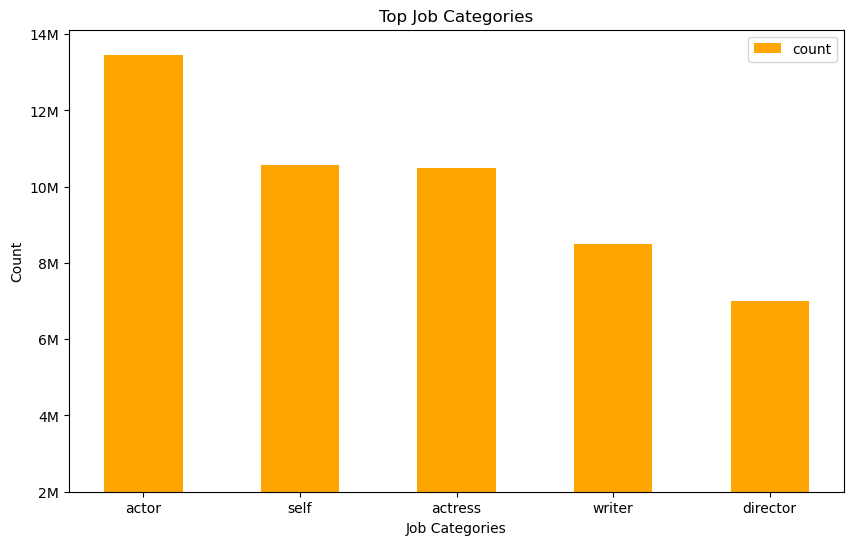

In [57]:
# Ploting
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(df_prin["category"], df_prin["count"], color="orange", width=0.5)

#Customization
ax.set_xlabel("Job Categories")
ax.set_ylabel("Count")
ax.set_title("Top Job Categories")

ax.set_xticklabels(df_prin["category"])

ax.legend(["count"], loc="upper right")

ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{int(x/1e6)}M'))
ax.set_ylim(bottom=2000000)

# Show plot
plt.show()

# PART 4 - Answer to the following questions:

## 1) Which movies, released in 2003, have received more than 50,000 votes and have an average rating of 8 or higher?

In [30]:
movie_genres = titles.join(ratings, on="tconst", how="inner") \
                      .where(col("titleType") == "movie") \
                      .where(col("startYear")== "2003") \
                      .where(col("numVotes") > 50000) \
                      .where(col("averageRating") >= 8.0) \
                      .sort(col("averageRating").desc()) \
                      .select(col("primaryTitle").alias("Movie"), col("averageRating").alias("Ratings"),col("numVotes").alias("Number of Votes"))
movie_genres.show(10, truncate=False)

+------------------------------------------------------+-------+---------------+
|Movie                                                 |Ratings|Number of Votes|
+------------------------------------------------------+-------+---------------+
|The Lord of the Rings: The Return of the King         |9.0    |1965196        |
|Oldboy                                                |8.3    |630695         |
|Kill Bill: Vol. 1                                     |8.2    |1184605        |
|Finding Nemo                                          |8.2    |1106772        |
|Memories of Murder                                    |8.1    |213610         |
|Pirates of the Caribbean: The Curse of the Black Pearl|8.1    |1202458        |
|Munna Bhai M.B.B.S.                                   |8.1    |87972          |
|Spring, Summer, Fall, Winter... and Spring            |8.0    |86510          |
|Dogville                                              |8.0    |157921         |
|Big Fish                   

## 2) List the films featuring Cillian Murphy as an actor since 2007, including their ratings. What is his highest-rated movie?

In [161]:
#Function to find the nconst for Artist

def finding_nconst(name, artist):
    return name.select("nconst","primaryName") \
               .where(col("primaryName") == artist).show()

In [165]:
finding_nconst(name, "Cillian Murphy")

+---------+--------------+
|   nconst|   primaryName|
+---------+--------------+
|nm0614165|Cillian Murphy|
+---------+--------------+



In [186]:
CM2 = titles.join(ratings, on="tconst", how="inner")
CM3 = CM2.join(principles, on="tconst", how="left")
CM3.show(5)


+---------+---------+--------------------+--------------------+-------+---------+-------+--------------+--------------------+-------------+--------+--------+---------+--------+---+------------------+
|   tconst|titleType|        primaryTitle|       originalTitle|isAdult|startYear|endYear|runtimeMinutes|              genres|averageRating|numVotes|ordering|   nconst|category|job|        characters|
+---------+---------+--------------------+--------------------+-------+---------+-------+--------------+--------------------+-------------+--------+--------+---------+--------+---+------------------+
|tt0000186|    short|   Le cuirassé Maine|   Le cuirassé Maine|      0|     1898|     \N|            \N|           Short,War|          4.5|      23|       1|nm0617588|director| \N|                \N|
|tt0000264|    short|Summoning the Spi...|   Évocation spirite|      0|     1899|     \N|             1|Fantasy,Horror,Short|          5.7|     477|       1|nm0617588|   actor| \N|["L'illusioniste"]|


In [190]:
CM4 = CM3.where(col("nconst") == "nm0614165") \
         .where(col('titleType') == "movie") \
         .where(col('startYear') >= 2007) \
         .where(col('category') == 'actor') \
         .sort(col('startYear').desc())
CM4.show(5)

+----------+---------+--------------------+--------------------+-------+---------+-------+--------------+--------------------+-------------+--------+--------+---------+--------+---+--------------------+
|    tconst|titleType|        primaryTitle|       originalTitle|isAdult|startYear|endYear|runtimeMinutes|              genres|averageRating|numVotes|ordering|   nconst|category|job|          characters|
+----------+---------+--------------------+--------------------+-------+---------+-------+--------------+--------------------+-------------+--------+--------+---------+--------+---+--------------------+
|tt27196021|    movie|Small Things Like...|Small Things Like...|      0|     2024|     \N|            96|       Drama,History|          7.2|     230|       1|nm0614165|   actor| \N|    ["Bill Furlong"]|
| tt5674658|    movie|   Kensuke's Kingdom|   Kensuke's Kingdom|      0|     2023|     \N|            85| Adventure,Animation|          7.1|     130|       1|nm0614165|   actor| \N|       

In [ ]:
CM5 = CM4.select(col("primaryTitle").alias("Movies"), col('startYear').alias('Year'), col('averageRating').alias('Avg Rating'))
CM5.show(50, truncate=False)

highest_rated_movie = CM5.sort(col("averageRating").desc()).first()
movie_name = highest_rated_movie['Movies']
movie_rating = highest_rated_movie['Avg Rating']

print(f"Highest rated movie: {movie_name} with a rating of {movie_rating}")

+-----------------------+----+----------+
|Movies                 |Year|Avg Rating|
+-----------------------+----+----------+
|Small Things Like These|2024|7.2       |
|Kensuke's Kingdom      |2023|7.1       |
|Oppenheimer            |2023|8.4       |
|A Quiet Place Part II  |2020|7.2       |
|Anna                   |2019|6.6       |
|Anthropoid             |2016|7.2       |
|Free Fire              |2016|6.3       |
|In the Heart of the Sea|2015|6.9       |
|Transcendence          |2014|6.2       |
|Aloft                  |2014|5.3       |
|Red Lights             |2012|6.2       |
|Retreat                |2011|5.8       |
|In Time                |2011|6.7       |
|Peacock                |2010|6.2       |
|Perrier's Bounty       |2009|6.3       |
|Waveriders             |2008|6.8       |
|Sunshine               |2007|7.2       |
|Watching the Detectives|2007|6.2       |
+-----------------------+----+----------+



Highest rated movie: Oppenheimer with a rating of 8.4


## 3) How many movies has Zendaya featured as an actress in each year?

In [166]:
finding_nconst(name, "Zendaya")

+---------+-----------+
|   nconst|primaryName|
+---------+-----------+
|nm3918035|    Zendaya|
+---------+-----------+



In [184]:
zen_join = titles.join(principles, on="tconst", how="left")
zen_join.show(5)


+----------+---------+--------------+--------------+-------+---------+-------+--------------+--------------------+--------+---------+--------+----+--------------------+
|    tconst|titleType|  primaryTitle| originalTitle|isAdult|startYear|endYear|runtimeMinutes|              genres|ordering|   nconst|category| job|          characters|
+----------+---------+--------------+--------------+-------+---------+-------+--------------+--------------------+--------+---------+--------+----+--------------------+
|tt10235078|tvEpisode|     Music Day|     Music Day|      0|     1989|     \N|            \N|        Family,Music|    NULL|     NULL|    NULL|NULL|                NULL|
| tt1515794|    movie|GK3: The Movie|GK3: The Movie|      0|     2005|     \N|           105|Action,Adventure,...|       1|nm0007618| actress|  \N|["Inspector Aleeza"]|
| tt1515794|    movie|GK3: The Movie|GK3: The Movie|      0|     2005|     \N|           105|Action,Adventure,...|       2|nm0406566| actress|  \N| ["Inspe

In [185]:
ze = zen_join.where(col("nconst") == "nm3918035") \
        .where(col("category") == "actress") \
        .where(col("titleType") == "movie") \
        .sort(col("startYear").desc()) \
        .filter(col("startYear") != "\\N") \
        .select(col("startYear").alias("Year")) \
        .groupBy("Year").count().withColumnRenamed("count","Total").sort(col("Year").desc())
ze.show()

+----+-----+
|Year|Total|
+----+-----+
|2024|    2|
|2021|    3|
|2018|    2|
|2017|    1|
+----+-----+



## 4) At what age did Audrey Hepburn, who is featured in the movie 'Breakfast at Tiffany's,' pass away?

In [182]:
ah = name.where(col("primaryName") == "Audrey Hepburn").filter(col("deathYear") != "\\N")
ah.show()


+---------+--------------+---------+---------+------------------+--------------------+
|   nconst|   primaryName|birthYear|deathYear| primaryProfession|      knownForTitles|
+---------+--------------+---------+---------+------------------+--------------------+
|nm0000030|Audrey Hepburn|     1929|     1993|actress,soundtrack|tt0046250,tt00583...|
+---------+--------------+---------+---------+------------------+--------------------+



In [183]:
ahh = ah.first()
ah_p = ahh['deathYear']
ah_b = ahh['birthYear']
age_death = int(ah_p) - int(ah_b)
print("Audrey Hepburn passed away at the age of", age_death)

Audrey Hepburn passed away at the age of 64


## 5) What is the movie(s) with the highest average rating among those featuring Chris Evans, known for his role in 'Captain America: The First Avenger'?

In [179]:
#Determining the nconst number of Chris Evans
ce_name = name.select("nconst","primaryName") \
         .where(col("primaryName") == "Chris Evans")
ce_name.show(5)


+----------+-----------+
|    nconst|primaryName|
+----------+-----------+
| nm0262632|Chris Evans|
| nm0262633|Chris Evans|
| nm0262634|Chris Evans|
| nm0262635|Chris Evans|
|nm10022496|Chris Evans|
+----------+-----------+
only showing top 5 rows



In [180]:
ce = zen_join.where(col("primaryTitle") == "Captain America: The First Avenger") \
             .select(col("primaryTitle").alias("Movies"), "nconst")
ce.show(5)


+--------------------+---------+
|              Movies|   nconst|
+--------------------+---------+
|Captain America: ...|nm5741914|
|Captain America: ...|nm4007632|
|Captain America: ...|nm4020764|
|Captain America: ...|nm0270559|
|Captain America: ...|nm0262635|
+--------------------+---------+
only showing top 5 rows



In [181]:
ce2 = ce.join(ce_name, on='nconst', how="inner").first()
ce3 = ce2['nconst']

ce4 = CM3.where(col("nconst")==ce3) \
         .where(col("category") == "actor") \
         .where(col("titleType") == "movie") \
         .sort(col("averageRating").desc()) \
         .select(col('primaryTitle').alias("Movies"), col("averageRating").alias("Highest Avg Rating"))

ce4.show(2, truncate=False)

+----------------------+------------------+
|Movies                |Highest Avg Rating|
+----------------------+------------------+
|Avengers: Infinity War|8.4               |
|Avengers: Endgame     |8.4               |
+----------------------+------------------+
only showing top 2 rows



## 6) What are the movies in which both Johnny Depp and Helena Bonham Carter have acted together?

In [168]:
finding_nconst(name, "Johnny Depp")
finding_nconst(name, "Helena Bonham Carter")

+---------+-----------+
|   nconst|primaryName|
+---------+-----------+
|nm0000136|Johnny Depp|
+---------+-----------+



+---------+--------------------+
|   nconst|         primaryName|
+---------+--------------------+
|nm0000307|Helena Bonham Carter|
+---------+--------------------+



In [176]:
jd = zen_join.where(col("nconst") == "nm0000136").where(col("titleType") == "movie").where(col("category") == "actor")
jd.show(5)


+---------+---------+--------------------+--------------------+-------+---------+-------+--------------+--------------------+--------+---------+--------+---+-----------------+
|   tconst|titleType|        primaryTitle|       originalTitle|isAdult|startYear|endYear|runtimeMinutes|              genres|ordering|   nconst|category|job|       characters|
+---------+---------+--------------------+--------------------+-------+---------+-------+--------------+--------------------+--------+---------+--------+---+-----------------+
|tt0363988|    movie|       Secret Window|       Secret Window|      0|     2004|     \N|            96|Drama,Mystery,Thr...|       1|nm0000136|   actor| \N|  ["Mort Rainey"]|
|tt0381270|    movie|  Happily Ever After|Ils se marièrent ...|      0|     2004|     \N|           100|  Comedy,Drama,Music|       1|nm0000136|   actor| \N|    ["L'inconnu"]|
|tt0113972|    movie|        Nick of Time|        Nick of Time|      0|     1995|     \N|            90|  Action,Crime,D

In [177]:
hbc = zen_join.where(col("nconst") == "nm0000307").where(col("titleType") == "movie").where(col("category") == "actress") \
              .withColumnRenamed("primaryTitle", "primaryTitle_hbc")
hbc.show(5)


+---------+---------+--------------------+--------------------+-------+---------+-------+--------------+--------------------+--------+---------+--------+---+--------------------+
|   tconst|titleType|    primaryTitle_hbc|       originalTitle|isAdult|startYear|endYear|runtimeMinutes|              genres|ordering|   nconst|category|job|          characters|
+---------+---------+--------------------+--------------------+-------+---------+-------+--------------+--------------------+--------+---------+--------+---+--------------------+
|tt0301390|    movie|     The Heart of Me|     The Heart of Me|      0|     2002|     \N|            96|       Drama,Romance|       1|nm0000307| actress| \N|["Dinah","Madelei...|
|tt0435623|    movie|Conversations wit...|Conversations wit...|      0|     2005|     \N|            84|Comedy,Drama,Romance|       1|nm0000307| actress| \N|           ["Woman"]|
|tt0133152|    movie|  Planet of the Apes|  Planet of the Apes|      0|     2001|     \N|           120|A

In [178]:
combo = jd.join(hbc, on="tconst", how="inner").select(col("primaryTitle").alias('Common Movies')).sort(col("primaryTitle").asc())
combo.show(truncate=False)

+----------------------------------------------+
|Common Movies                                 |
+----------------------------------------------+
|Alice Through the Looking Glass               |
|Alice in Wonderland                           |
|Charlie and the Chocolate Factory             |
|Corpse Bride                                  |
|Dark Shadows                                  |
|Sweeney Todd: The Demon Barber of Fleet Street|
+----------------------------------------------+



## 7) What are the highest and lowest-rated movies in the Harry Potter franchise featuring Daniel Radcliffe, and what are their ratings?

In [173]:
dr_nconst = finding_nconst(name, "Daniel Radcliffe")

+---------+----------------+
|   nconst|     primaryName|
+---------+----------------+
|nm0705356|Daniel Radcliffe|
+---------+----------------+



In [174]:
hp = CM2.filter(col('primaryTitle').contains("Harry Potter and the")) \
           .select("tconst","primaryTitle","averageRating",)
hp.show(5)

+---------+--------------------+-------------+
|   tconst|        primaryTitle|averageRating|
+---------+--------------------+-------------+
|tt0417741|Harry Potter and ...|          7.6|
|tt0241527|Harry Potter and ...|          7.6|
|tt0304141|Harry Potter and ...|          7.9|
|tt0304142|Harry Potter and ...|          7.3|
|tt0304140|Harry Potter and ...|          7.4|
+---------+--------------------+-------------+
only showing top 5 rows



In [175]:
jd = zen_join.where(col("nconst") == "nm0705356") \
             .where(col("titleType") == "movie") \
             .where(col("category") == "actor") \
             .withColumnRenamed("primaryTitle", "primaryTitle_hbc")
jd.show(5)

+---------+---------+--------------------+--------------------+-------+---------+-------+--------------+--------------------+--------+---------+--------+---+----------------+
|   tconst|titleType|    primaryTitle_hbc|       originalTitle|isAdult|startYear|endYear|runtimeMinutes|              genres|ordering|   nconst|category|job|      characters|
+---------+---------+--------------------+--------------------+-------+---------+-------+--------------+--------------------+--------+---------+--------+---+----------------+
|tt0417741|    movie|Harry Potter and ...|Harry Potter and ...|      0|     2009|     \N|           153|Action,Adventure,...|       1|nm0705356|   actor| \N|["Harry Potter"]|
|tt0241527|    movie|Harry Potter and ...|Harry Potter and ...|      0|     2001|     \N|           152|Adventure,Family,...|       1|nm0705356|   actor| \N|["Harry Potter"]|
|tt0304141|    movie|Harry Potter and ...|Harry Potter and ...|      0|     2004|     \N|           142|Adventure,Family,...|

In [172]:
combo2 =jd.join(hp, on="tconst", how="inner") \
          .select("primaryTitle", "averageRating")
combo2.show(truncate=False)

hr_ratings = combo2.sort(col("averageRating").desc()).first()
hr_name = hr_ratings['primaryTitle']
hr_rate = hr_ratings['averageRating']

lr_ratings = combo2.sort(col("averageRating").asc()).first()
lr_name = lr_ratings['primaryTitle']
lr_rate = lr_ratings['averageRating']

print(f"Highest Rating in the Harry Potter Franchise: {hr_name} with a rating of {hr_rate}")
print(f"Lowest Rating in the Harry Potter Franchise: {lr_name} with a rating of {lr_rate}")

+--------------------------------------------+-------------+
|primaryTitle                                |averageRating|
+--------------------------------------------+-------------+
|Harry Potter and the Half-Blood Prince      |7.6          |
|Harry Potter and the Sorcerer's Stone       |7.6          |
|Harry Potter and the Prisoner of Azkaban    |7.9          |
|Harry Potter and the Deathly Hallows: Part 2|8.1          |
|Harry Potter and the Chamber of Secrets     |7.4          |
|Harry Potter and the Order of the Phoenix   |7.5          |
|Harry Potter and the Goblet of Fire         |7.7          |
|Harry Potter and the Deathly Hallows: Part 1|7.7          |
+--------------------------------------------+-------------+



Highest Rating in the Harry Potter Franchise: Harry Potter and the Deathly Hallows: Part 2 with a rating of 8.1
Lowest Rating in the Harry Potter Franchise: Harry Potter and the Chamber of Secrets with a rating of 7.4
